Nowy plik pca_d01_frame_I300_93f16d65b09bc50e6e36d7846cd953aa8fe5a2da.txt
[[-4.69751453e+00 -1.47593188e+00  1.00878909e-01 ... -2.75957175e-02
   9.48580354e-03  8.08104724e-02]
 [-4.69336271e+00 -1.49369383e+00  9.97901335e-02 ...  5.49039319e-02
   4.49618296e-04 -1.19900154e-02]
 [-4.67364264e+00 -1.47438812e+00  1.04805529e-01 ... -2.29185522e-02
   3.37197669e-02 -4.84425575e-02]
 ...
 [ 8.51668835e-01  4.91402596e-01 -1.04100518e-01 ... -2.00327095e-02
  -3.78478654e-02 -4.48105857e-02]
 [ 1.14458680e+00  2.14887038e-01 -1.26508027e-01 ...  5.98771013e-02
   4.13676351e-02  2.60095205e-03]
 [ 8.59583795e-01  2.94981688e-01 -8.16100463e-02 ...  8.15523267e-02
  -1.21476024e-01 -1.23367915e-02]]


C:\Users\5c1cz\AppData\Local\Temp\ipykernel_6448\1005577035.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xdr[index, 0], Xdr[index, 1], s=5, color=color,


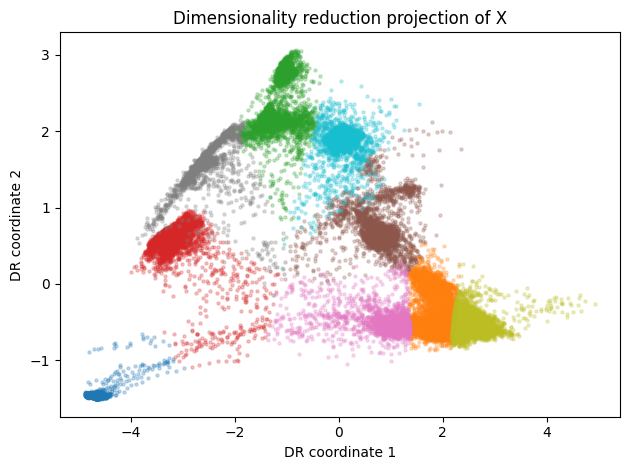

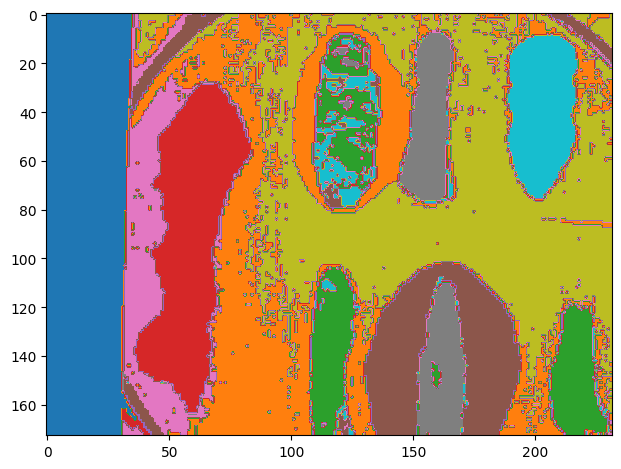

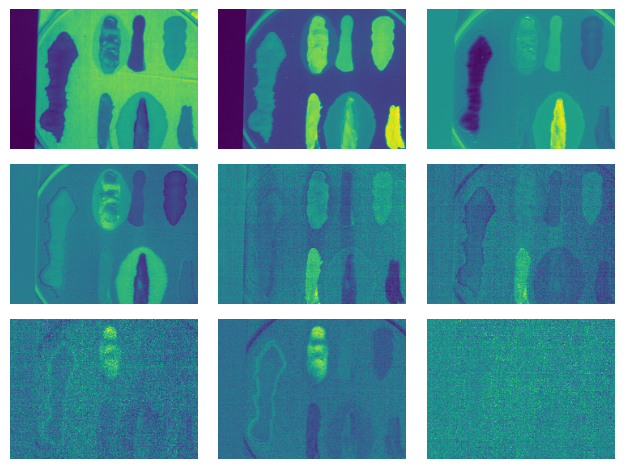

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from FileSystemCache import FileSystemCache

# Kmeans on Xdr from pca
if __name__ == '__main__':
    fname = 'd01_frame_I300'
    #fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    
    data = record['data']
    X = np.reshape(data, (-1, data.shape[-1]))
    
    
    pca = PCA(n_components=10)

    Xdr = FileSystemCache(pca.fit_transform, filename=f"pca_{fname}").execute(X)
    print(Xdr)
    n_clusters = 9
    clustering = KMeans(n_clusters=n_clusters).fit(Xdr)

    # clustering = AgglomerativeClustering(n_clusters=n_clusters, 
    #                                      linkage='single').fit(Xdr)


    plt.figure('Clustering scatterplot')
    for i, label in enumerate(set(clustering.labels_)):
        index = clustering.labels_ == label
        color = plt.cm.tab10(label / (n_clusters - 1))
        plt.scatter(Xdr[index, 0], Xdr[index, 1], s=5, color=color, 
                    alpha=0.25, cmap=plt.cm.tab10)
    plt.xlabel('DR coordinate 1')
    plt.ylabel('DR coordinate 2')
    plt.title('Dimensionality reduction projection of X')
    plt.tight_layout()
    
    plt.figure('Clustering image')
    labels2 = np.reshape(clustering.labels_, data.shape[:2])
    plt.imshow(labels2, cmap=plt.cm.tab10)
    plt.tight_layout()
    
    plt.figure('Component inspection')
    for i_component in range(min(Xdr.shape[1], 9)):
        plt.subplot(3, 3, 1 + i_component)
        component2 = Xdr[:, i_component].reshape(data.shape[:2])
        plt.imshow(component2)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    